# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# Installing the libraries and disabling the output of the cell.
!pip install numpy pandas matplotlib seaborn --quiet

In [5]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [7]:
# Importing the CSV file containing the data set and assigning it to order_data.
order_data = pd.read_csv("C:/Users/HP 14s/Documents/Great Learning/Introduction to Python - Course/Project/foodhub_order.csv")

In [8]:
# Obtaining a preview of the first 5 rows of the data and the Column titles.
order_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [9]:
# Obtaining the number of rows and columns in the data set.
order_data.shape

(1898, 9)

#### Observations:
There are 1,898 row and 9 columns in the data of the FoodHub company.

In [11]:
# Obtaining the Data types of each column:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The Pandas dataframe contains of 9 columns namely 'order_id' containing Integers, 'customer_id' containing Integers, 'restaurant_name' containing 
string values, 'cuisine_type' containing string values, 'cost_of_the_order' containing floating numbers i.e numbers with decimals, 'day_of_the_week' 
containing string values, 'rating' containing string values, 'food_preparation_time' containing integer values and 'delivery_time' containing integer 
values.

#### Key Insights on the Data:
1) All columns have the same number of non-null row values.
2) There is 1 column of float data, 4 with integer data, and 4 with string data.
3) There could be missing values in the column of 'rating' filled with non-number values because the rating is out of 5 therefore the data type is expected to be of Integer or float and yet it is of string type with no non-null row values.
4) We need to explore the values in columns to understand the unique values of each and verify that there isn't unwanted data.
5) The data is consuming a memory of 133.6 KB

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [14]:
# Printing the unique values in the rating column to see the string that is making the column be of string type.
print('Rating: \n',order_data['rating'].unique())


Rating: 
 ['Not given' '5' '3' '4']


In [15]:
# Replacing the values 'Not given' into null_value 'NaN'
order_data['rating'] = order_data['rating'].replace('Not given',np.nan)

#Converting the datatype of the rating column into integer type from object type.
order_data['rating'] = order_data['rating'].astype(float)

#Getting the percentage of missing values in the 'ratings' column
pd.DataFrame({'percentage':(order_data.isnull().sum()[order_data.isnull().sum()>0]/order_data.shape[0])*100})

,percentage
rating,38.777661


In [31]:
#Extracting all information in the other columns in which the rating wasn't given.
order_data.loc[order_data['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


In [29]:
# Dropping all rows with the missing data for rating:
new_order_data = order_data[order_data['rating'].notnull()]

#Resetting the indices in the new_order_data:
new_order_data.reset_index(drop=True,inplace=True)

#Checking whether there are any missing values in the new_order_data.
new_order_data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

1) The 'Rating' column has values of 'Not given' which are strings and this should be treated as missing values.
2) The missing values in the column 'rating' contribute 38.77% of the total data which will require me to drop the rows in the event that their isn't a clear pattern in the missing data.
3) There seemed to be no clear pattern in the missing data under 'rating'column when the rows with missing rating data are filtered out.

#### Insight:
The rating column contains data that directly captures the extent of a customer's satisfaction for each order made and received. With the missing data above 30%, if I Impute with a measure of centrality, it will largely distort my overrall measure of the customer satisfaction. By dropping this data, I maintain the sample of above 60% of the population to get me a clearer estimate of the customer satisfaction levels.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [33]:
# Checking the statistical summary of the Data:
order_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [35]:
new_order_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1162.0,NaN,NaN,NaN,1477519.642857,546.871297,1476547.0,1477062.25,1477523.5,1477991.75,1478444.0
customer_id,1162.0,NaN,NaN,NaN,171939.471601,114551.215031,5139.0,77540.0,128655.5,276066.25,403019.0
restaurant_name,1162,156,Shake Shack,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1162,14,American,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1162.0,NaN,NaN,NaN,16.760766,7.572578,4.47,12.13,14.6,22.75,35.41
day_of_the_week,1162,2,Weekend,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1162.0,NaN,NaN,NaN,27.381239,4.677922,20.0,23.0,27.0,32.0,35.0
delivery_time,1162.0,NaN,NaN,NaN,24.154045,4.930999,15.0,20.0,25.0,28.0,33.0


#### Observations:
1. Minimum time to prepare food is 20 minutes.
2. Average time to prepare food is 27.37 minutes.
3. Maximum time to prepare food is 35 minutes.

#### Insights:
A comparison of the mean, percentiles and standard deviations of the various columns of the original data and the new data without missing values show low variation with the percentiles being equal across both data sets apart from the columns; cost_of_the_order, customer_id and order_id suggesting that I might as well use the original data set to evaluate for Customer satisfaction with minimal effects on the results.

### **Question 5:** How many orders are not rated? [1 mark]

In [37]:
# Finding out the count of missing values in column 'rating':
order_data['rating'].isnull().sum()

736

#### Observations:
There are 736 orders that were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

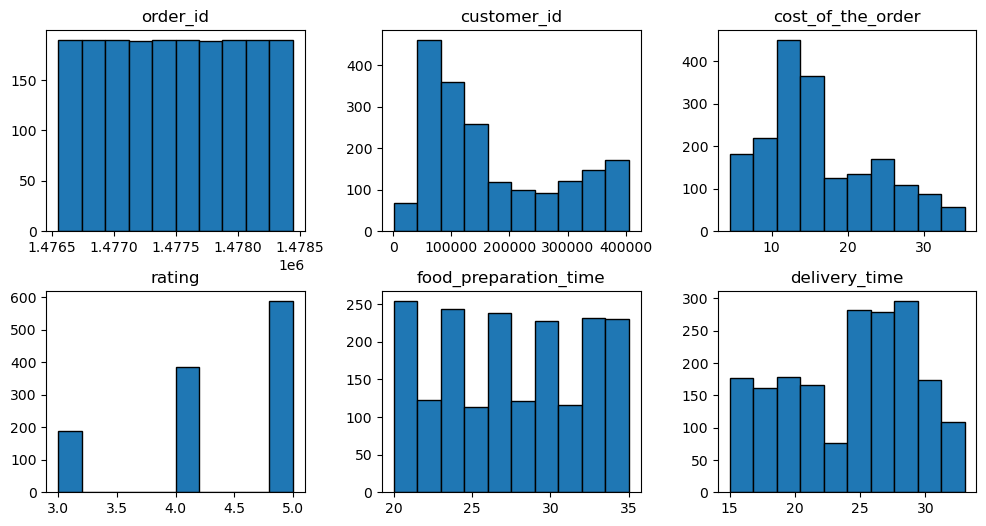

In [42]:
#Creating histograms for all the numerical variables to have a broad idea on whether or not their is a distribution to investigate further;

#Creating a figure area inwhich to plot subplots;
fig, axis = plt.subplots(2, 3, figsize=(12,6))

#creating histogram for each column with numeriacal data

order_data.hist(ax=axis, edgecolor='black', grid=False);

#### Observations;
1) The variable order-id has no distribution. Need to verify with a kde plot.
2) customer_id appears to have a bi-model distribution thus need to plot a box plot and kde plot to further examine the distribution.
3) cost_of_the_order appears to have a generally right skewed distribution however shows a small raise between 20 and 30 suggesting a posibility of a bi-model distribution thus need for additional investigation with box plot and kde plot.
4) rating appears to have a left skewed distribution of discrete values. This can be verified by a box plot and kde plot.
5) food_preparation_time appears to have a multi-model distribution. This needs further investigation with a kde plot and box plot.
6) delivery_time apprears to have a bi-model distribution that is skewed towards the left.

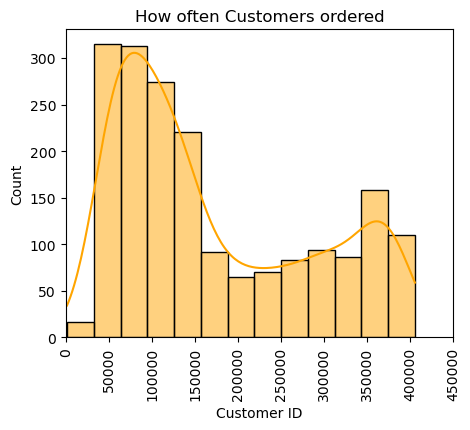

In [44]:
# Histogram and kde plot to show the distribution of the customer_id.
#Designating the size of the plot area:
plt.figure(figsize=(5,4))

#Customising the x-axis label and Title:
plt.title('How often Customers ordered')
plt.xlabel('Customer ID')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Plotting the Histogram;
#Setting the limits of the x-axis
plt.xlim(0,450000)

# Plotting a histogram and kde;
sns.histplot(data=order_data, x= 'customer_id',color='orange',kde=True);

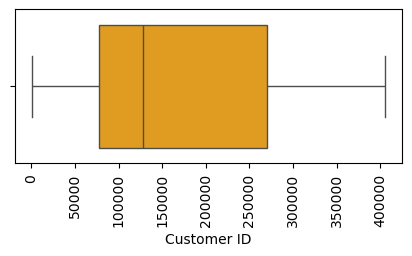

In [45]:
# Box plot to show the distribution of customer_id:

#Designating the size of the plot area:
plt.figure(figsize=(5,2))

#Customising the x-axis label:
plt.xlabel('Customer ID')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Plotting the Histogram;
sns.boxplot(data=order_data, x= 'customer_id',color='orange');

#### Observation;
1) The Customer_id Variable has a bi-model distribution that is skewed to the right. 
2) Customers with ID numbers between 35,000 and 160,000 used the app most frequently.
3) No outliers in Customer_id therefore there isn't probably a forged customer id that could be a sign of a previous data breach.

#### Insight;
I will need to determine the average rating, delivery time, most ordered cuisines, cost of order and preparation time for clusters of customer_id derived from how frequently they ordered. This can give insights on the variables that lead to customers re-ordering and how that related with the rating they gave.

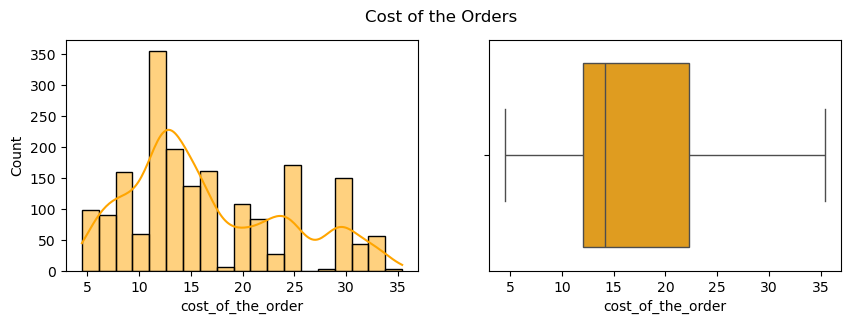

In [47]:
# Histogram, kde and box plot to show the distribution of the order costs.
# kde and box plot to confirm the distribution of the variable 'rating'.

#Setting up the plot area for subplots;
fig, axes=plt.subplots(1,2,figsize=(10,3))
fig.suptitle('Cost of the Orders')

#Plotting kde plot for plot;
sns.histplot(ax=axes[0], x= order_data['cost_of_the_order'],color='orange',kde=True);
sns.boxplot(ax=axes[1],x=order_data['cost_of_the_order'],color='orange');

#### Observations in Cost of the Order;
1) The cost_of_the_order Variable has a multi-model distribution that is skewed to the right. 
2) Majority of the orders made cost between 11 dollars and 14 dollars.
3) There are no outliers
4) more than 75% of the orders cost above 10 dollars and only 25% of the orders cost above 22 dollars

#### Insight relating to the Cost of the Order;
There are clusters within the cost_of_the_order variable with 5 dollars to 17 dollars as the first cluster, 17 dollars to 26 dollars as a second cluster and above 26 dollars as the thrid cluster. Each of these has low and peak points and the relationship with cuisine, rating, restaurant_name preferred should be investigated for each cluster.

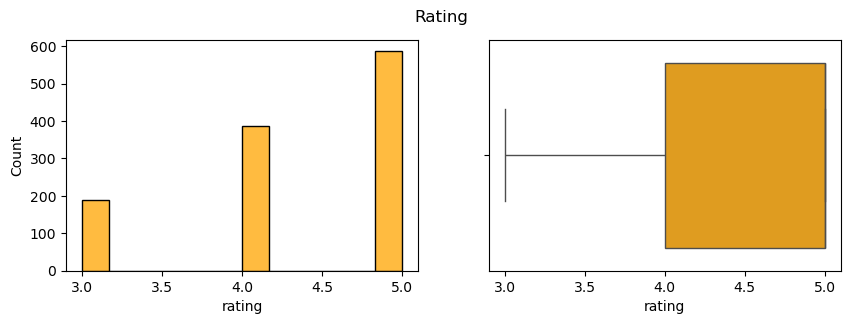

In [49]:
# kde and box plot to confirm the distribution of the variable 'rating'.

#Setting up the plot area for subplots;
fig, axes=plt.subplots(1,2,figsize=(10,3))
fig.suptitle('Rating')

#Plotting kde plot for plot;
sns.histplot(ax=axes[0], x= order_data['rating'],color='orange');
sns.boxplot(ax=axes[1],x=order_data['rating'],color='orange');

#### Observations on the rating;
1) the rating variable is skewed to the left and has no outliers.
2) 75% of the orders were rated above 4.
3) Close to 600 orders were rated with a 5 contributing to more that 50% of the orders.

#### Insights into the rating;
There is need to find out what variable affected the rating that was given for an order. These will be the variables that will have to be worked on to improve customer experience.

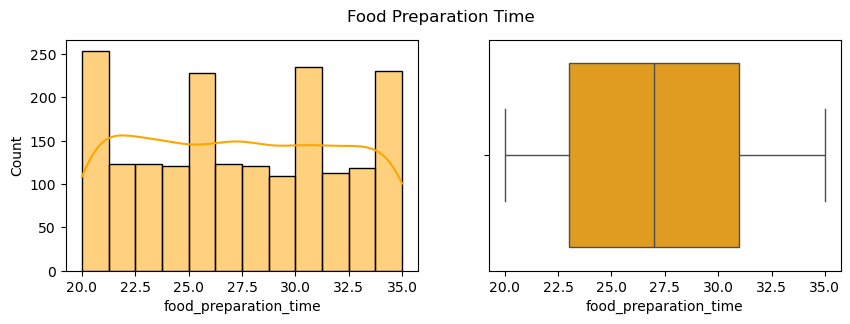

In [51]:
# kde and box plot to confirm the distribution of the variable 'food_preparation_time'.

#Setting up the plot area for subplots;
fig, axes=plt.subplots(1,2,figsize=(10,3))
fig.suptitle('Food Preparation Time')

#Plotting kde plot for plot;
sns.histplot(ax=axes[0], x= order_data['food_preparation_time'],color='orange',kde=True);
sns.boxplot(ax=axes[1],x=order_data['food_preparation_time'],color='orange');

#### Observations in food preparation time;
1) The food preparation time of normally distributed.
2) More than 75% of the orders took above 23 minutes to prepare.
3) About 50% of the orders took less than 27 minutes to prepare.

#### Insights;
1) How does food preparation time relate with cuisine type, restaurant and rating?
2) Is there a relationship between food preparation time and cost of the order?

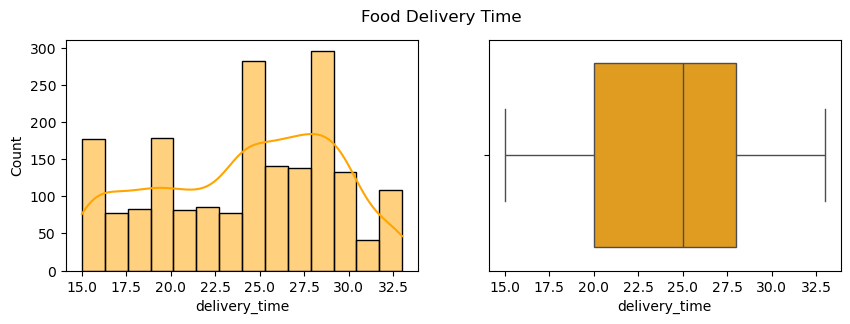

In [53]:
# kde and box plot to confirm the distribution of the variable 'delivery_time'.

#Setting up the plot area for subplots;
fig, axes=plt.subplots(1,2,figsize=(10,3))
fig.suptitle('Food Delivery Time')

#Plotting kde plot for plot;
sns.histplot(ax=axes[0], x= order_data['delivery_time'],color='orange',kde=True);
sns.boxplot(ax=axes[1],x=order_data['delivery_time'],color='orange');

#### Observations in Food Delivery Time;
1) The delivery time has a left skewed distribution with a average delivery time of 25 minutes.
2) There are no outliers in the delivery time thus no sign of extreme high or low performance.

#### Insights;
1) There is a slight delay in delivery of orders.

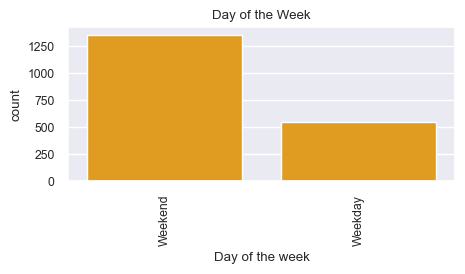

In [182]:
# Count plot to show the number of orders per day of the week.
#Designating the size of the plot area:
plt.figure(figsize=(5,2))

#Customising the x-axis label and Title:
plt.title('Day of the Week')
plt.xlabel('Day of the week')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Plotting the Count plot;
sns.countplot(data=order_data, x= 'day_of_the_week',color='orange');
#Increasing plot font size:
sns.set(font_scale = 1)

#### Observations;
There were more orders made and completed over the weekend than on weekdays.

#### Insight;
Restaraunts should position themselves to have more workforce during the weedends to support the increase in orders.

C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


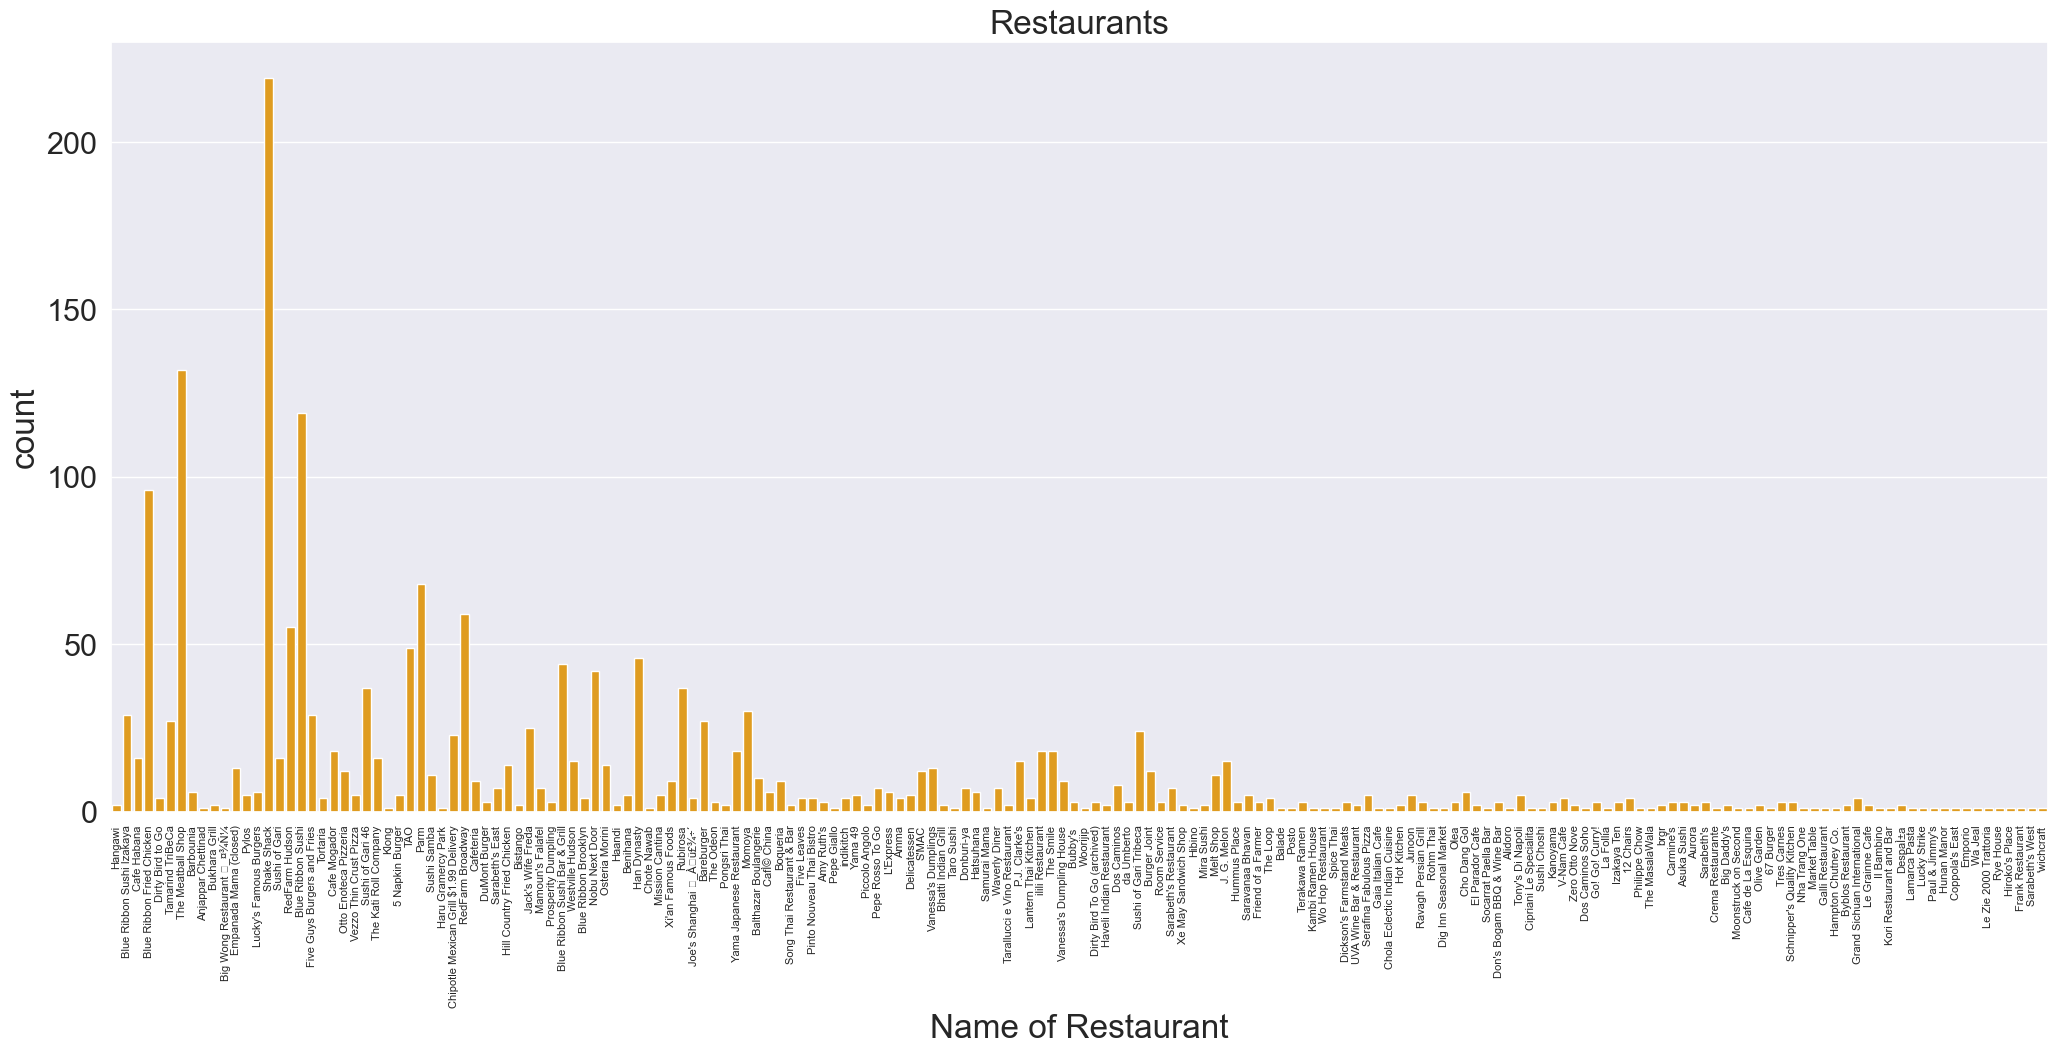

In [211]:
# Count plot to show the number of orders per Restaurant.
#Designating the size of the plot area:
plt.figure(figsize=(25,10))

#Customising the x-axis label and Title:
plt.title('Restaurants')
plt.xlabel('Name of Restaurant')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Changing the font size of the x-axis
plt.xticks(fontsize = 8)

#Plotting the Count plot;
sns.countplot(data=order_data, x= 'restaurant_name',color='orange');
#Increasing plot font size:
sns.set(font_scale = 1)

#### Observations;
1) Shake Shack is the restaurant that completed the most orders that were more that 200.
2) Majority of the restaurants completed less than 50 orders.

#### Insights;
1) Why does Shake Shack have so many orders completed?
2) What are the cuisines, preparation time and cost of order for the top 5 restaurants? How do these interact with Number of orders and rating?


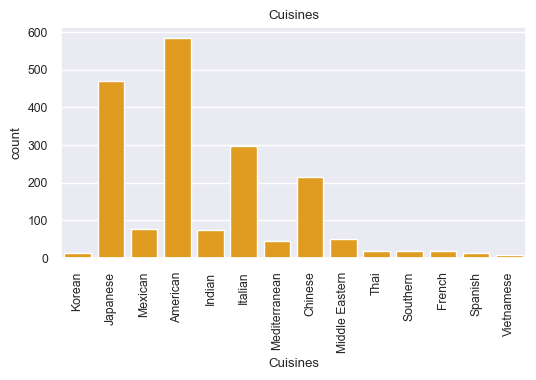

In [198]:
# Count plot to show the cuisine count.
#Designating the size of the plot area:
plt.figure(figsize=(6,3))

#Customising the x-axis label and Title:
plt.title('Cuisines')
plt.xlabel('Cuisines')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Plotting the Count plot;
sns.countplot(data=order_data, x= 'cuisine_type',color='orange');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP 14s\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


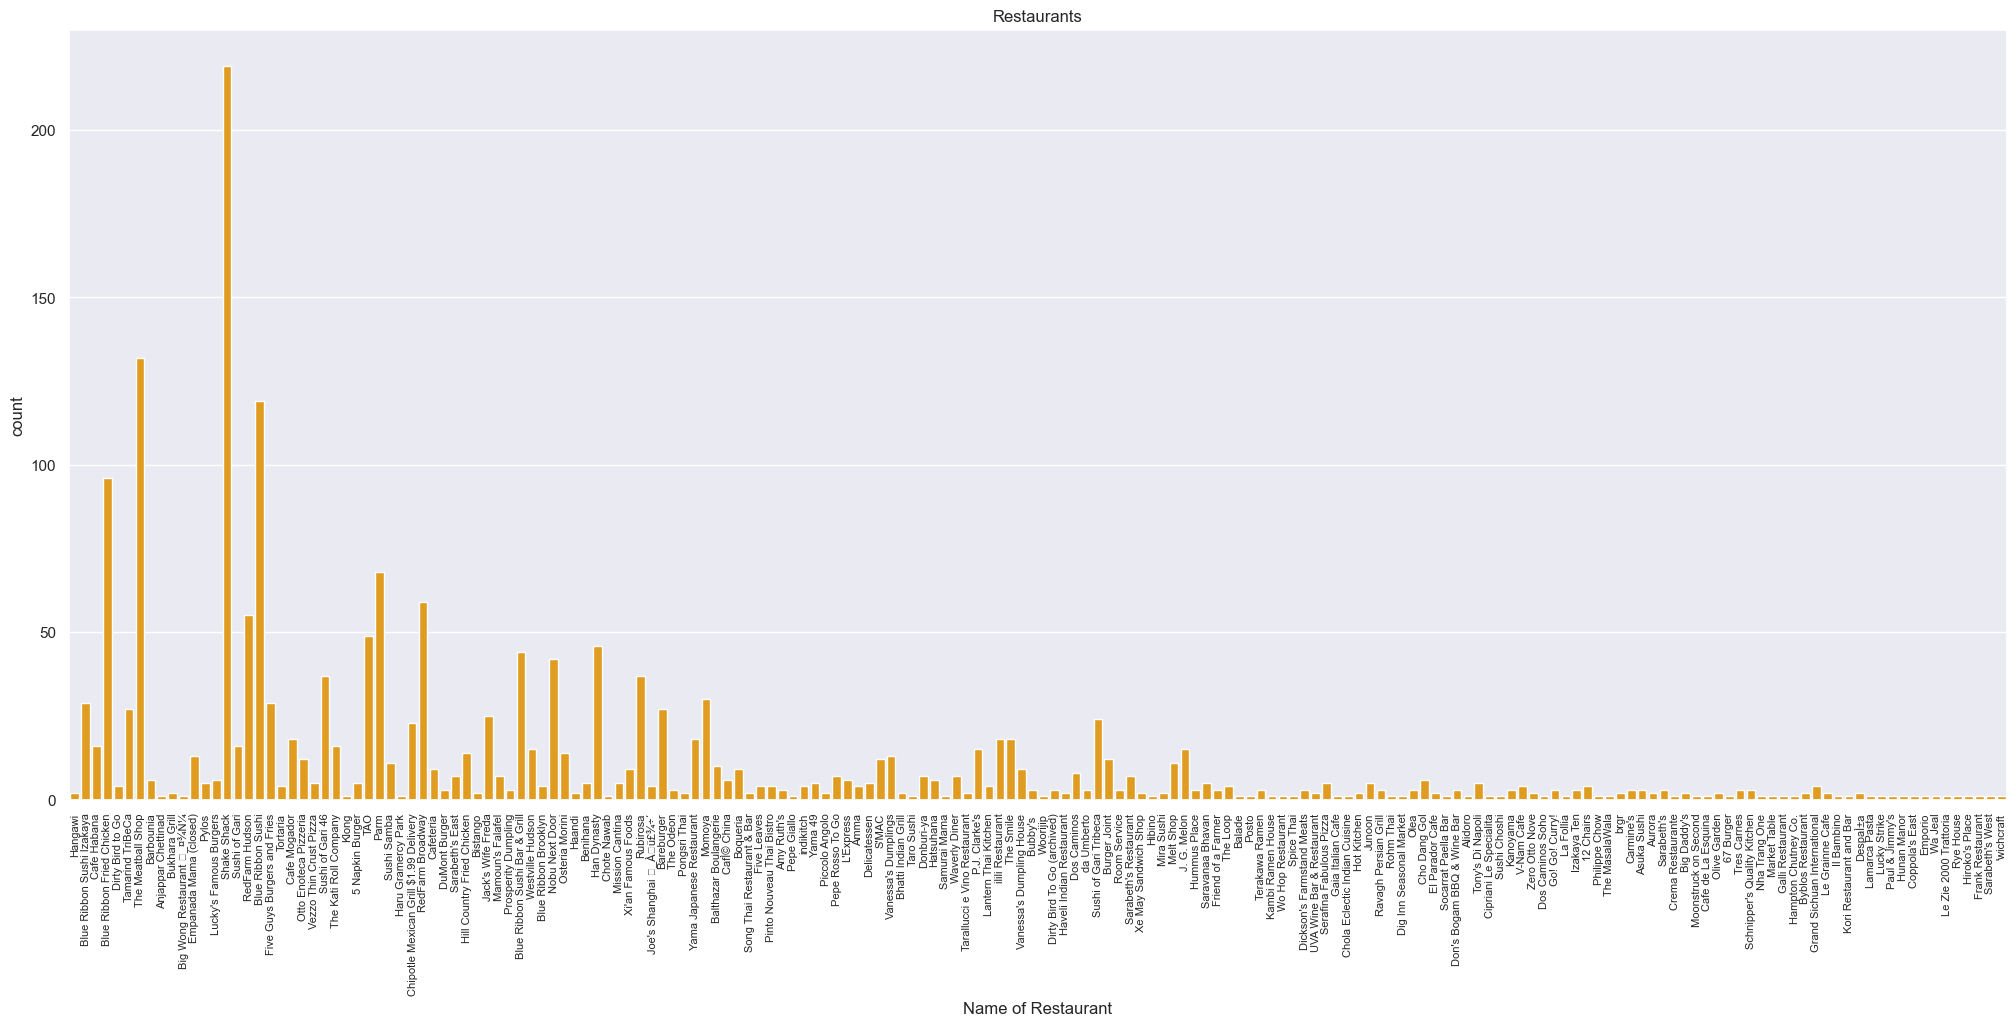

In [335]:
# Count plot to show the number of orders per Restaurant.
#Designating the size of the plot area:
plt.figure(figsize=(25,10))

#Customising the x-axis label and Title:
plt.title('Restaurants')
plt.xlabel('Name of Restaurant')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Changing the font size of the x-axis
plt.xticks(fontsize = 8)

#Plotting the Count plot;
sns.countplot(data=order_data, x= 'restaurant_name',color='orange');
#Increasing plot font size:
sns.set(font_scale = 1)

#### Observations:
Shake Shack has the most orders followed by The Meatball shop, then Blue Ribbon Sushi, 
then Blue Ribbon Fried chicken and then Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

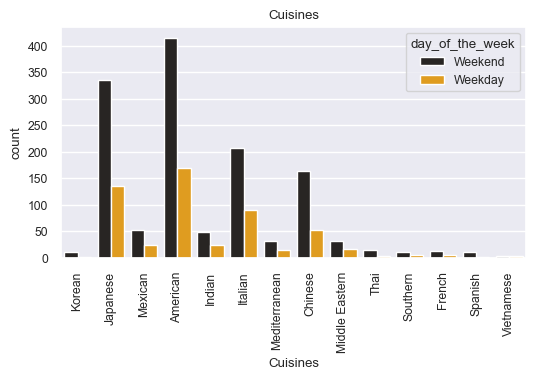

In [216]:
# Count plot to show the Cuisine count.
#Designating the size of the plot area:
plt.figure(figsize=(6,3))

#Customising the x-axis label and Title:
plt.title('Cuisines')
plt.xlabel('Cuisines')

#Rotating the x-axis labels to be vertical for ease of reading:
plt.xticks(rotation = 90);

#Plotting the Count plot;
sns.countplot(data=order_data, x= 'cuisine_type',hue='day_of_the_week',palette='dark:orange');

#### Observations:
American is the most popular cuisine on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [254]:
# Getting percentage of orders costing above 20 dollars using value_count().sum() divided by total number of rows.
percentage_of_orders = (order_data.loc[order_data['cost_of_the_order']>20,'restaurant_name'].value_counts().sum()/order_data.shape[0])*100
percentage_of_orders


29.24130663856691

#### Observations:
There are 29.24% of the orders that cost above 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [258]:
# Finding the mean delivery time with the .mean() method;
order_data['delivery_time'].mean()


24.161749209694417

#### Observations:
The Mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [397]:
# Find the top 3 most frequent customers using value_counts();
customer_buying_frequency = order_data['customer_id'].value_counts()
customer_buying_frequency

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:
Customer ID 52832 had the highest number of orders with 13 orders placed, followed by Customer ID 47440 who placed 10 orders in total and the third was Customer ID 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


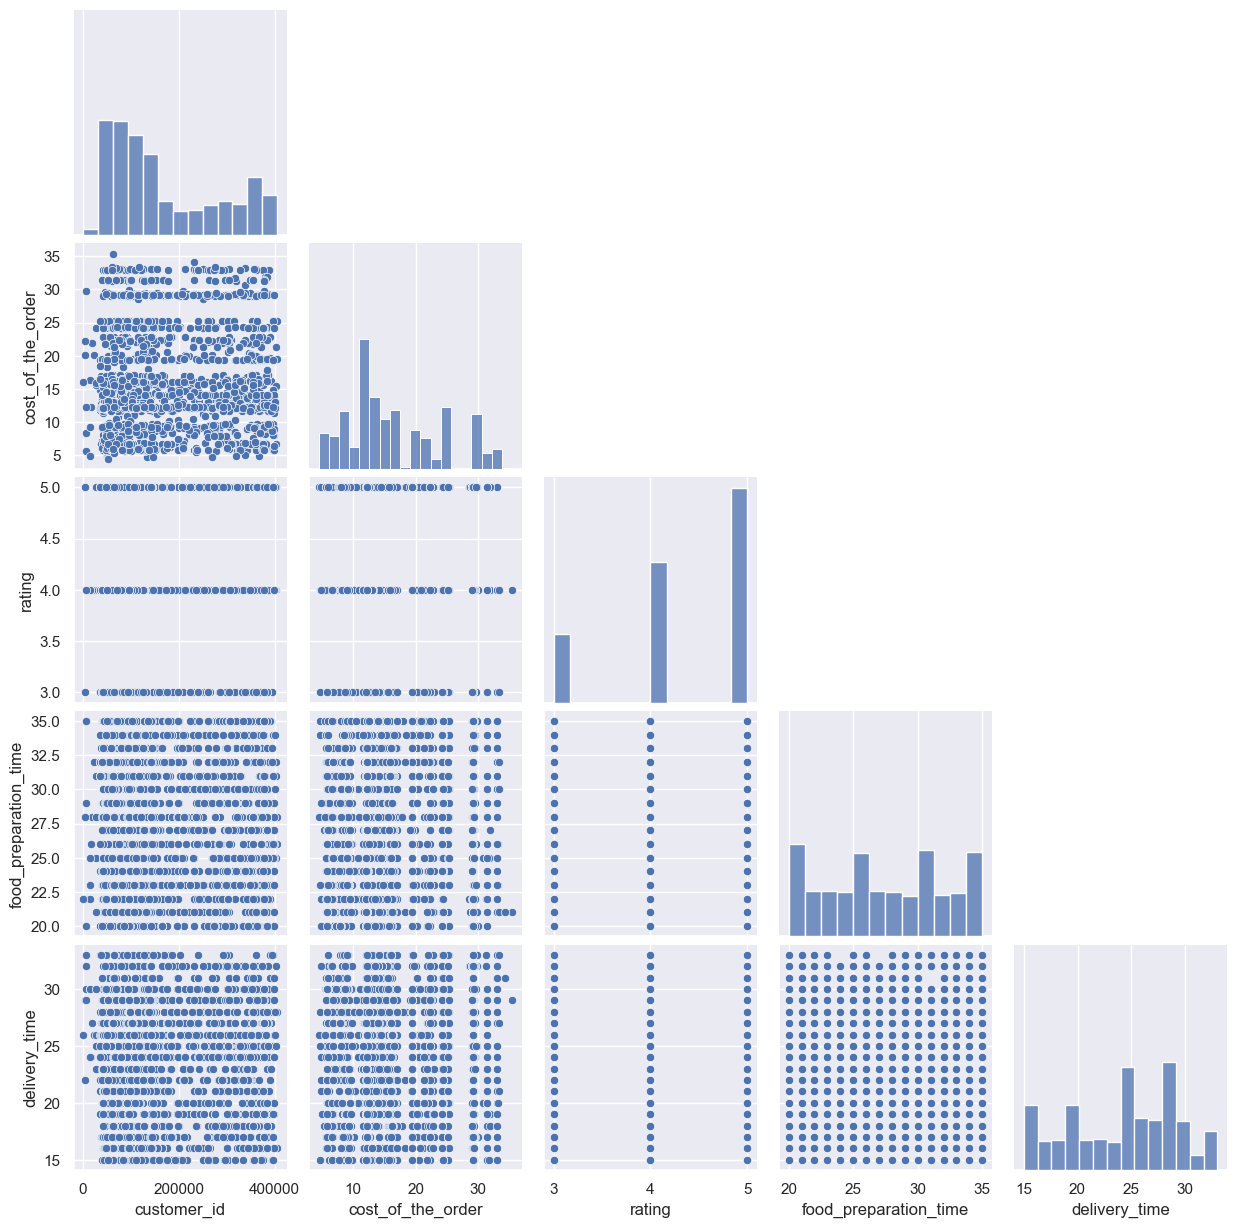

In [349]:
#plotting pair plots of the the numerical variables to visualise their relationship amongst each other;
sns.pairplot(data=order_data[['customer_id','cost_of_the_order','rating','food_preparation_time','delivery_time']],corner=True);

#### Observation;
1) From the Pair-wise Scatter plots above of the numerical variables, there appears not to be a visible trend in any of the paired variables.
2) rating and customer_id are discrete variables are showing a tendancy of the points to align alone their discrete value levels.

#### Insights;
Confirm with a HeatMap the level and direction of correlation between paired numeric variables.

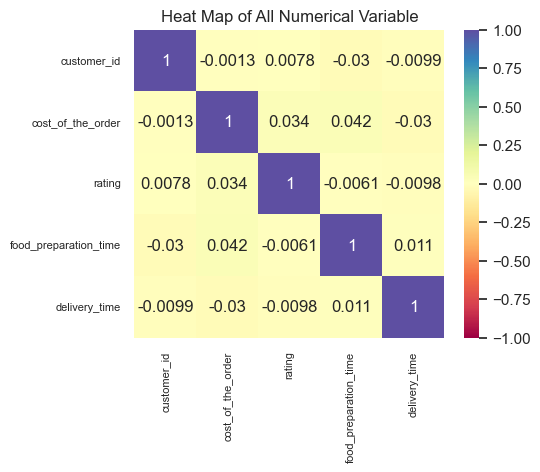

In [339]:
# Checking the levels of Correlation among pairs of the numericalvariables to determine which pairs to further explore.
#Designating the size of the plot area:
plt.figure(figsize=(5,4))

#Customising the plot Title:
plt.title('Hea',fontsize = 12)

#setting up a heat map with correlation cooefficients;
sns.heatmap(data=order_data[['customer_id','cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(),annot=True,vmin=-1,vmax=1,cmap='Spectral');

#reducing font size of the entire chart
sns.set(font_scale = 1)

#Adjusting the font size of the y and x axes
plt.xticks(fontsize = 8);
plt.yticks(fontsize = 8);

#### Observations from the HeatMap;
1) Overall, all numerical variables have weak correlations below 30% that we can't base on any to conclude that their is a pair that affects each other.
2) Rating & Delivery_time, rating & food_preparation_time, cost_of_the_order & delivery_time, customer_id & delivery_time, customer_id & cost_of_order, customer_id & food_preparation_time all have negative correlations.
3) cost_of_the_order & food_preparation_time, cost_of_the_order & rating, customer_id  & rating, food_preparation_time & delivery_time all have positive correlations.
4) The highest correlation of 4.2% is between cost_of_the_order & food_preparation_time.

#### Insights;
1) Given that the numerical variables have weak correlations between themselves, We cannot rely on their relationships to derive strong conclusions on cause and effect.
2) Looking back at the histogram of cost_of_the_order and its kde plot, it appeared to have a multi-model distribution. Let me split cost_of_the_order into cost bins of 0-11, 12-17 and 18-27 to see whether there are correlations and trends.
3) Given that cost_of_the_order & food_preparation_time and cost_of_the_order & delivery_time have the highest correlations among all the variable pairings, I will assess these further.

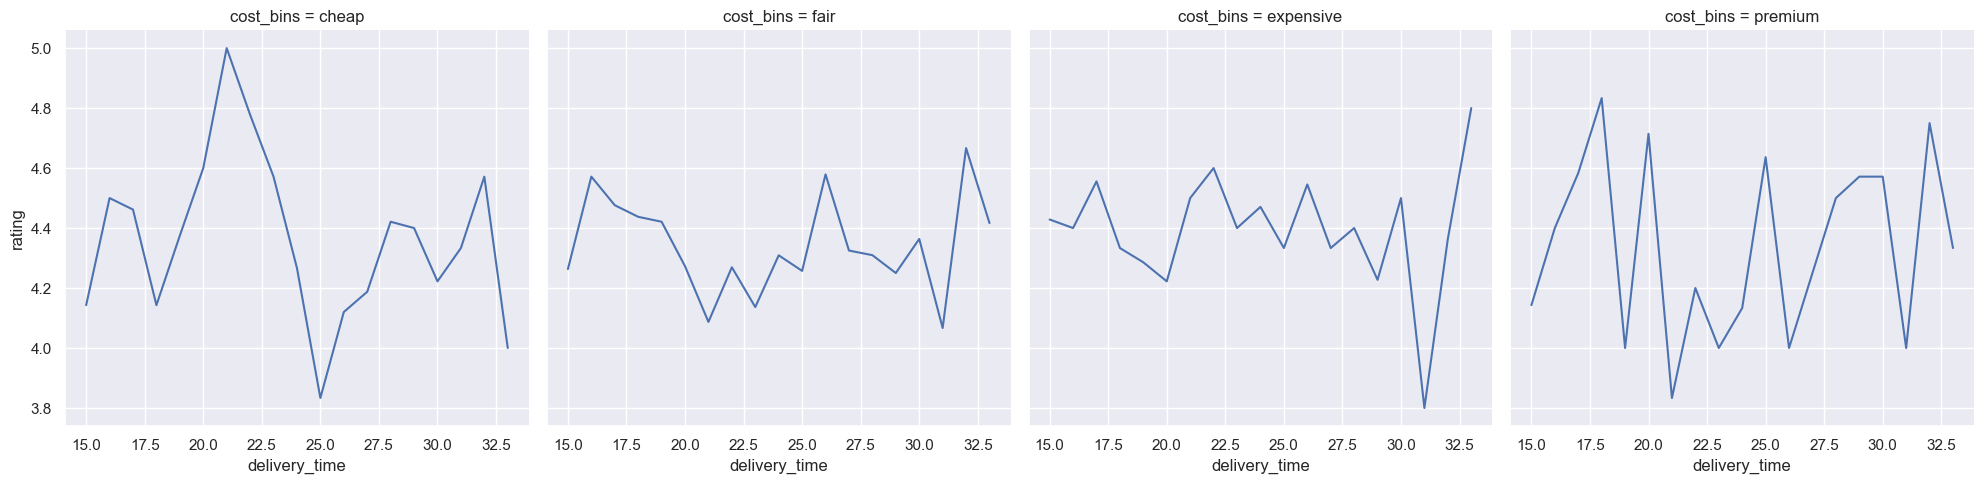

In [442]:
#Making bins for cost_of_order into cheap, fair, expensive and premium;
order_data['cost_bins'] = pd.cut(order_data['cost_of_the_order'],[0,11,17,27,36],labels=['cheap','fair','expensive','premium'],right=False)

#Plotting a line plot to examine the distribution of rating and delivery time based on the cost of order bins.
sns.relplot(data=order_data, x='delivery_time', y='rating',col='cost_bins',kind='line',errorbar=None);

#### Observations;
1) The cost of the order and how long it took to be delivered seems to have an effect on the rating received.
2) The cheaper orders (below 11 dollars)that got delivered early appear to have a better rating than cheaper orders delivered beyond 25 minutes.
3) Fair priced orders (11 to 17 dollars) generally got an okay rating regardless of how long it took to have them delivered.
4) Expensive priced orders (17 to 27 dollars) generally got an okay rating when they were delivered before 30 minutes.
5) Premium priced order (above 36 dollars) never get a rating of 5 regardless of the delivery time.

#### Insights
The line graph under cheap price of order and premium price of order seem to habour outliers and the distributions need further investigation.

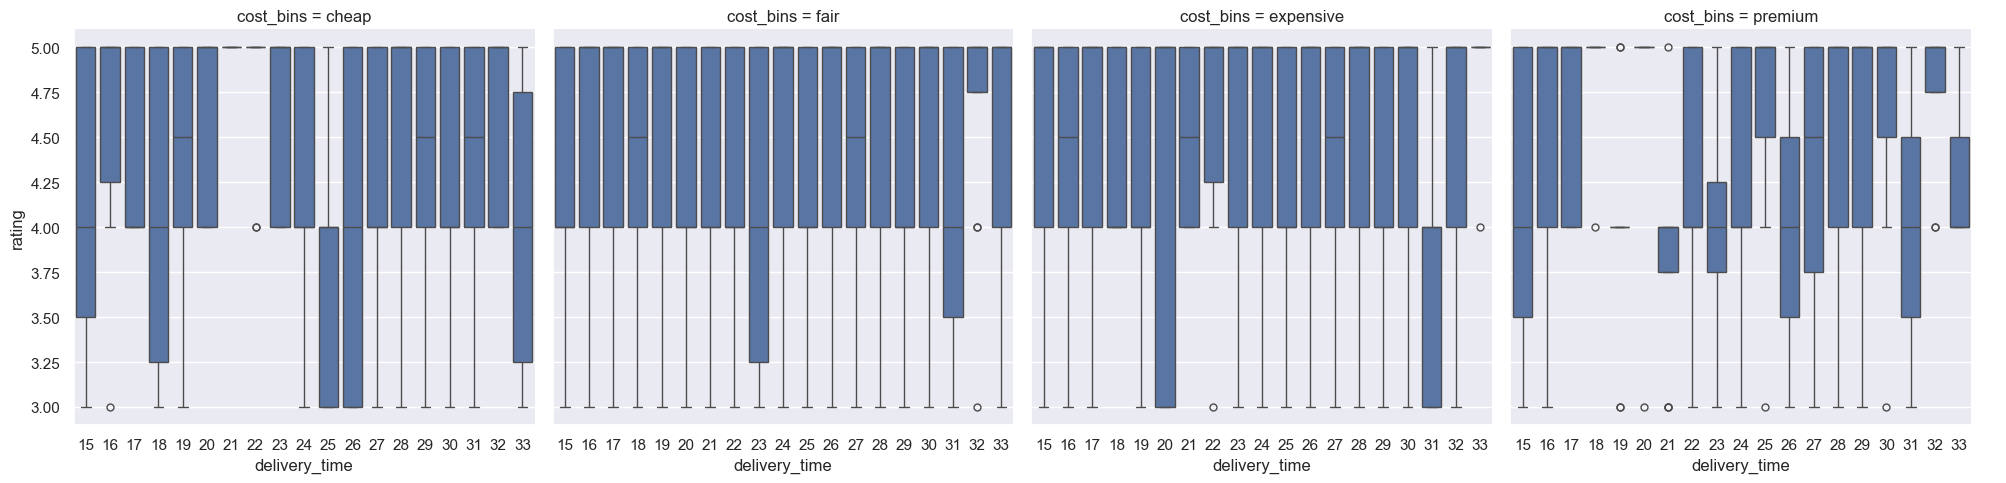

In [444]:
#Assessing the distribution of the delivery_time relative to rating across the order price bins;
sns.catplot(x='delivery_time',y='rating', col='cost_bins',data=order_data,col_wrap=4,kind='box');

#### Observation;
1) The rating of 3 when a cheap priced order (below 11 dollars) or expensive priced order is delivered within 22 minutes is considered an outlier.
2) A rating of 3 or 4 when a fair priced order (11 to 17 dollars) is delivered after 32 minutes is consider an outlier.
3) Fair priced orders generally obtained a rating of above 4 regardless of how long it took to deliver the order.
4) Expensive priced orders generally obtained a rating above 4 when delivery was made within 30 minutes.
5) A restaurant with preminum pricing has a 75% chance of getting a rating above 3.5 regardless of the delivery time.

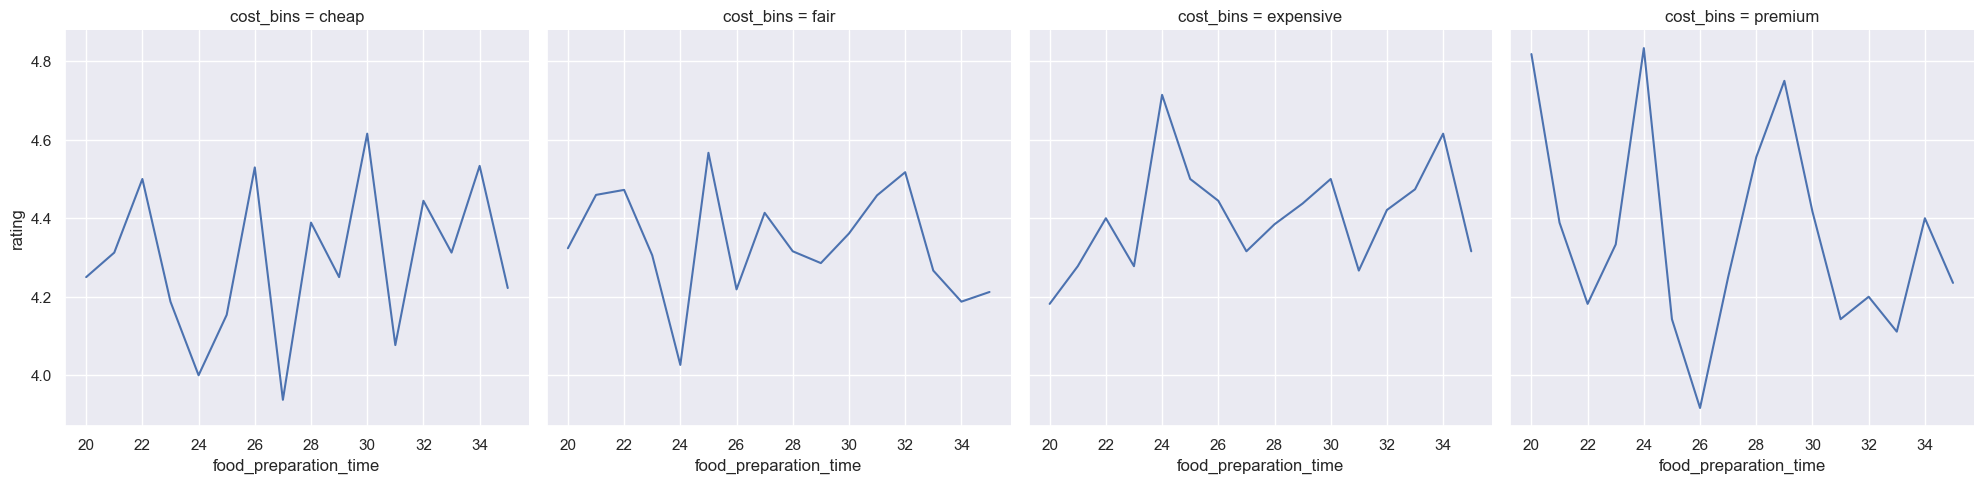

In [449]:
#Plotting a line plot to examine the distribution of rating and food_preparation_time based on the cost of order bins.
sns.relplot(data=order_data, x='food_preparation_time', y='rating',col='cost_bins',kind='line',errorbar=None);

#### Observations;
1) Overall, rating was generally above 4 regardless of the cost level of the order or the time take to prepare the order.

#### Insights;
Need to look into the best time a restaurant should take to prepare an order based on the cuisine.

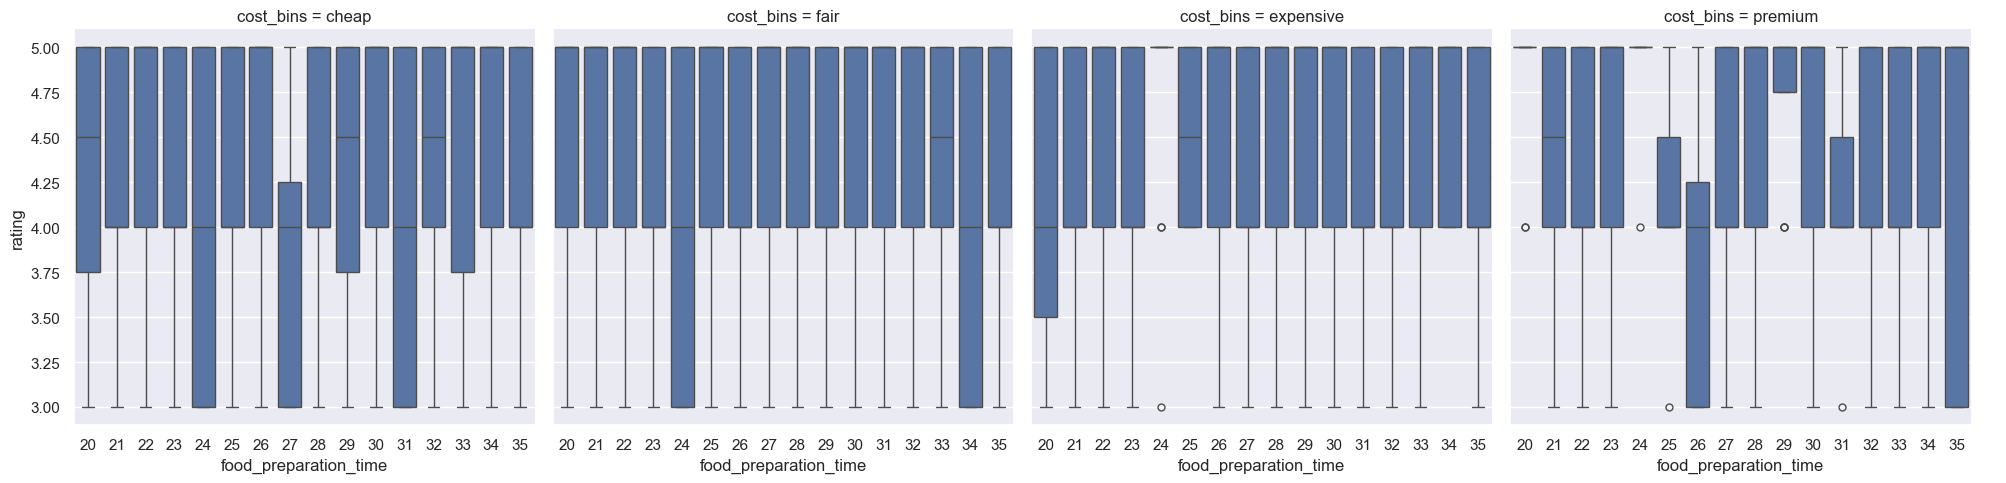

In [454]:
#Investigating for any outliers in the relationship between rating and food preparation time with in the order cost clusters;
sns.catplot(x='food_preparation_time',y='rating', col='cost_bins',data=order_data,col_wrap=4,kind='box');

#### Observations;
1) The outliers are predominatly present when the cost of the order is above 17 dollars.
2) All the outliers involved giving a lower rating and occured when the cost of the order was above 17 dollars and was prepared largely within 29 minutes.
3) Pricing the order between 17 and 27 dollars then taking beyond 21 minutes to prepare the order resulted into a rating of 4 and above 75% of the time.
4) Customers expect orders costing below 11 dollars to be prepared faster within 23 minutes.

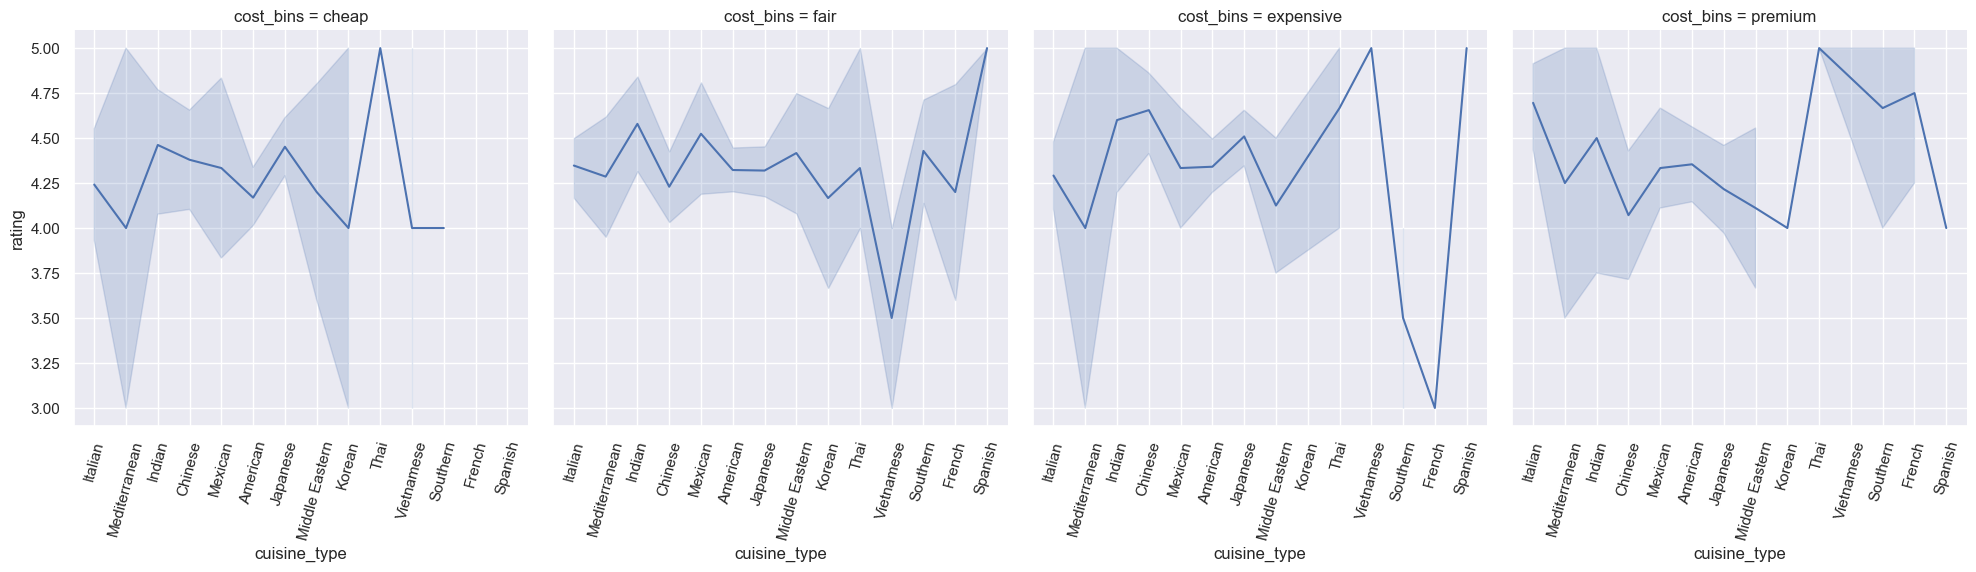

In [475]:
#Comparing the Cuisine type with the rating within the cost of order bins
g = sns.relplot(data=order_data, x='cuisine_type', y='rating',col='cost_bins',kind='line');
#changing orientation of the x-axes;
g.set_xticklabels(rotation=75);

#### Observations;
1) When order prices are below 11 dollars, customers gave rating of 4 and above to all cuisine types except French and Spanish cuisines which had no ratings. The highest rating at this price level was Thai cuisine with a rating of 5.
2) Thai cuisine is highly rated regardless of the cost of the order.
3) Vietnamese cuisines on average had ratings below 4 when they were priced between 11 and 17 dollars.

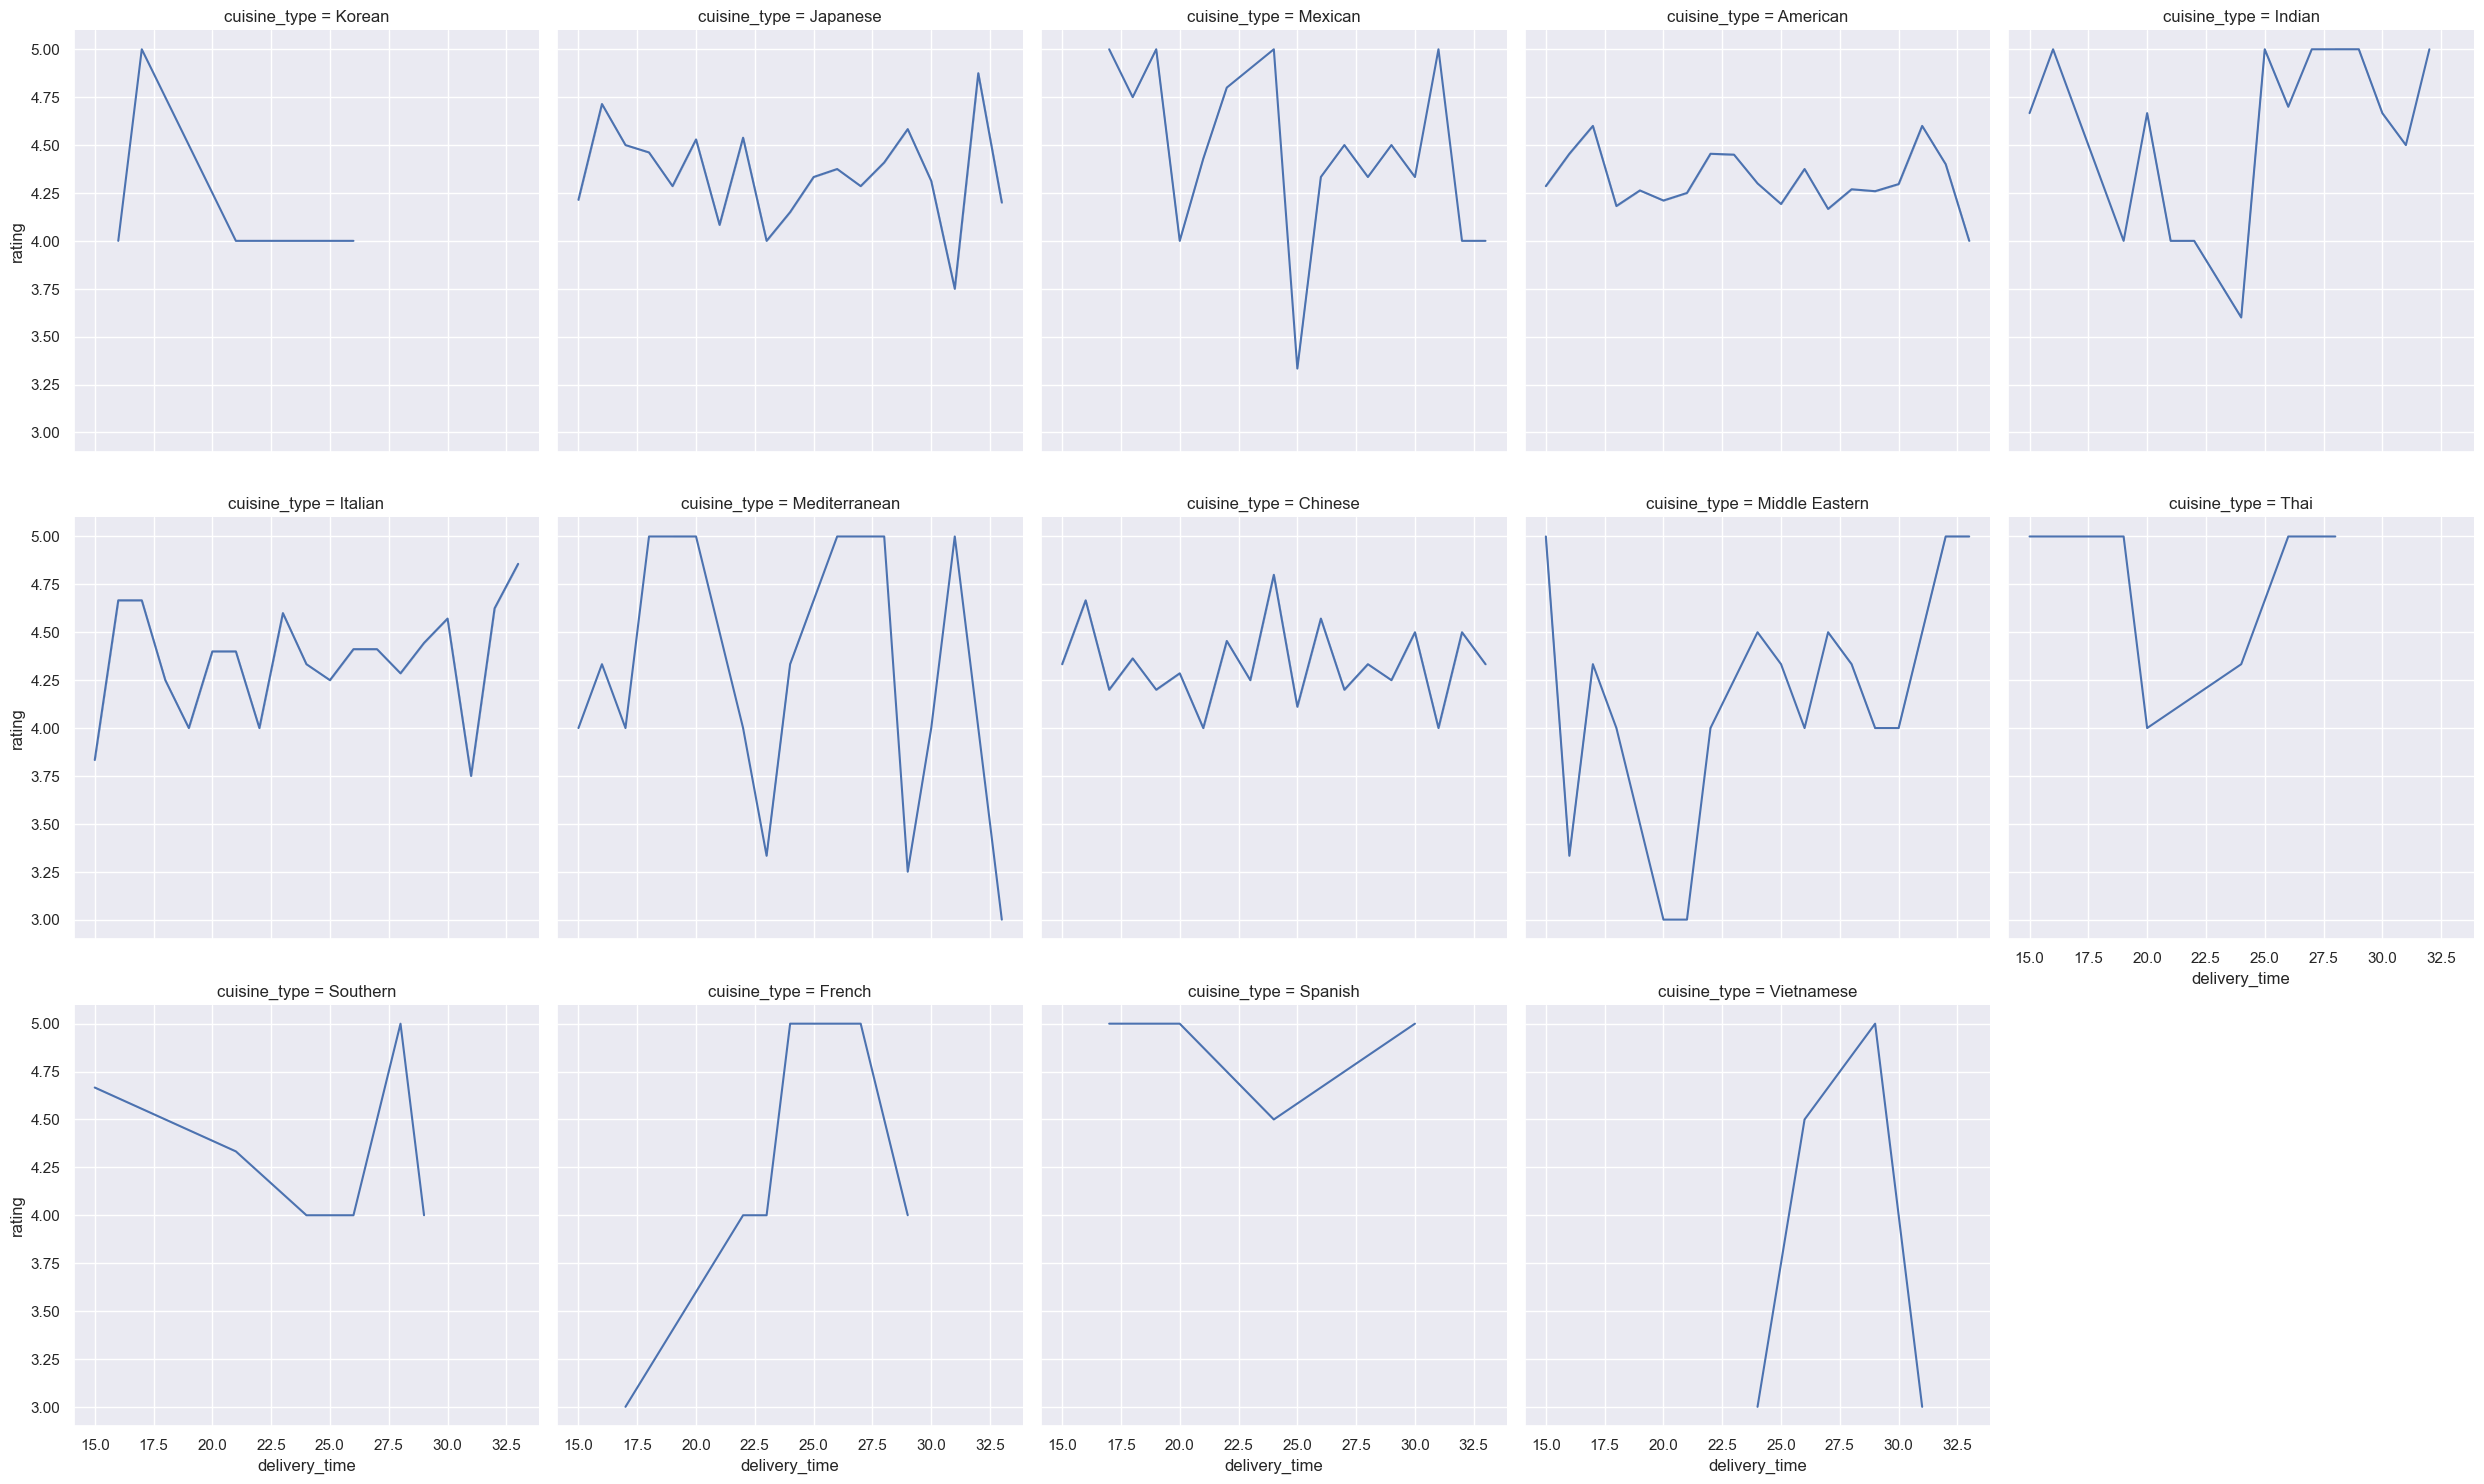

In [506]:
#Comparing the rating with delivery time within the Cuisine type
sns.relplot(data=order_data, x='delivery_time', y='rating',col='cuisine_type',kind='line',col_wrap=5,errorbar=('ci', False));

#### Observations;
There is alot of variation in how the cuisine type's delivery time affects the order rating.
Generally, American, Chinese, Japanes, Italian, Southern, Thai and spanish cuisine order ratings are least affected by delivery time.

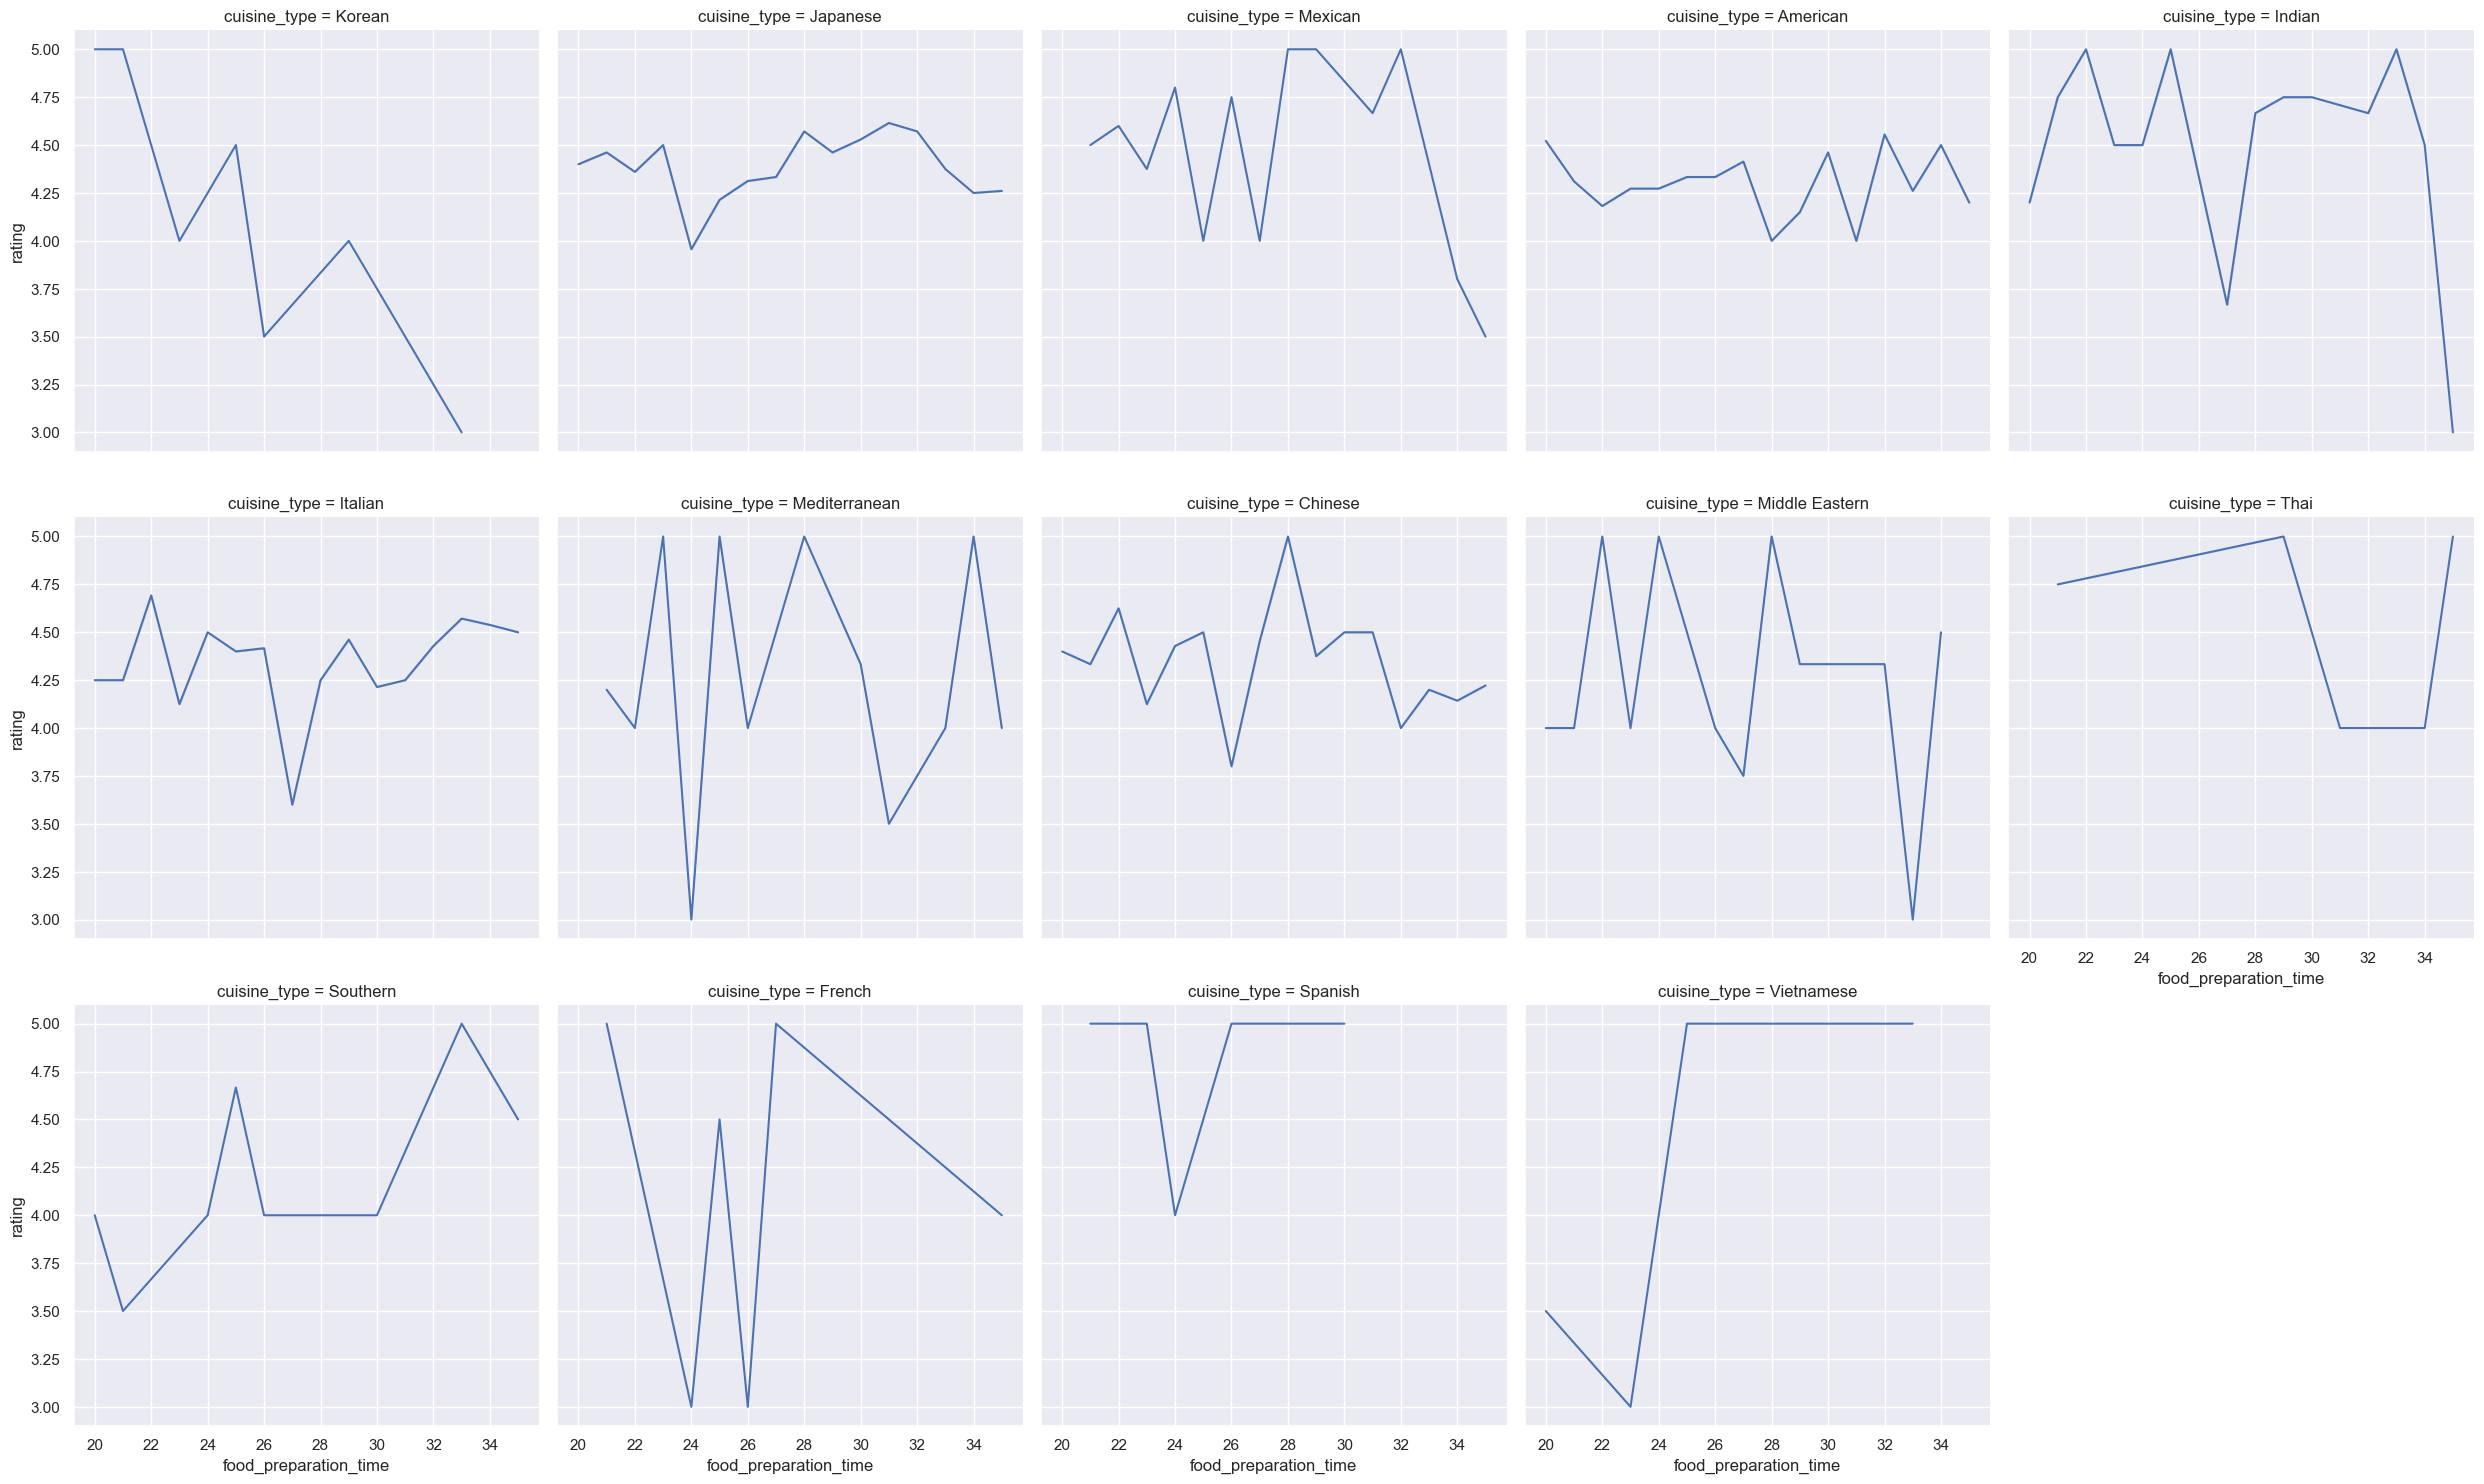

In [510]:
#Comparing the rating with order preparetion time within the Cuisine type
sns.relplot(data=order_data, x='food_preparation_time', y='rating',col='cuisine_type',kind='line',col_wrap=5,errorbar=('ci', False));

#### Observation,
1) Korean Cuisines order ratings were most affected by order preparation time wereby customers expected them within 25 minutes to give a rating of above 4.
2) Japanese, Mexican, American, Italian, Chinese, Spanish, Thai cuisines order ratings were least affected by food preparation time and on averge were rated above 3.75

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [523]:
# Calculate\ing the number of ratings and average rating for each restaurant
restaurant_ratings = order_data.groupby(['restaurant_name'])['rating'].agg(['count', 'mean'])

# Filtering restaurants based on the given conditions
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the promotional restaurants
promotional_restaurants

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328
Blue Ribbon Sushi,73,4.219
Shake Shack,133,4.278
The Meatball Shop,84,4.512


#### Observations:
The Restaurants are; Shake Shack, Blue Ribbon Fried Chicken, The Meatball Shop and Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [526]:
# Calculate net revenue for orders with cost > 20 dollars
order_data['net_revenue'] = np.where(order_data['cost_of_the_order'] > 20, 0.25 * order_data['cost_of_the_order'], 0)

# Calculate net revenue for orders with cost > 5 dollars
order_data['net_revenue'] = np.where((order_data['cost_of_the_order'] > 5) & (order_data['cost_of_the_order'] <= 20), 0.15 * order_data['cost_of_the_order'], order_data['net_revenue'])

# Calculate total net revenue
total_net_revenue = order_data['net_revenue'].sum()

# Display the total net revenue
print(total_net_revenue)

6166.303


#### Observations:
Total revenue across orders is 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [529]:
# Calculate total delivery time
order_data['total_time'] = order_data['food_preparation_time'] + order_data['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
percentage = (order_data['total_time'][order_data['total_time'] > 60].count() / order_data['total_time'].count()) * 100

# Display the percentage
print(percentage)

10.537407797681771


#### Observations:
10.54% of the orders take more than 60 minutes to be delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [534]:
# Calculate mean delivery time for weekdays
weekday_mean = order_data[order_data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate mean delivery time for weekends
weekend_mean = order_data[order_data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Display the mean delivery times
print('Mean delivery time for weekdays:',weekday_mean, 'minutes')
print('Mean delivery time for weekends:',weekend_mean, 'minutes')

Mean delivery time for weekdays: 28.340036563071298 minutes
Mean delivery time for weekends: 22.4700222057735 minutes


#### Observations:
Mean delivery time for weekdays: 28.34 minutes. 
Mean delivery time for weekends: 22.45 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Delivery time influenced customer satisfaction to varying levels within the order cost ranges of 0 to 11 dollars, 11 to 17 dollars, 18 to 27 dollars and above 27 dollars therefore the restaurants and delivery personalle should price well and ensure timely delivery.
*  Pricing orders at above 27 dollars gives a restaurant a 75% chance of getting a rating above 3.5
*  When order prices were between 11 and 17 dollars, 89.47% of the time, customers gave a rating of 4 and above regardless of delivery time.
*  When order prices were between 11 and 17 dollars for Vietnamese cuisine type, the rating was below 4 on average
*  Customers are not bothered by the time it takes to prepare their order and therefore the restaurants can focus on improving the quality of the order to improve customer satisfaction by improving packing, presentation or spicing of the orders instead of rushing through the order preparation and producing less quality food.
*  Costing an order above 17 dollars and preparing it very fast within 29 minutes resulted into unfair low rating from customers. This could be due to the customers having a feeling that their order was not prepared to their expectations given its price and feel the restaurant didn't invest enough time into the order.
*  Costing orders between 17 and 27 dollars and then taking above 21 minutes preparing them resulted into a higher customer satisfaction with a rating of 4 and above 75% of the time.
*  Restaurants that are offering orders at costs below 11 dollars are expected to prepare the orders in a shorter time by customers.
*  Thai Cuisines were rated above 4 regardless of the cost of the order and yet they had few orders overall. This could be down to low awareness of  customers towards the Thai cuisine type.
*  American, Chinese, Japanes, and Italian cuisine order ratings are least affected by delivery time and this partly explains why they are the most ordered cuisines.

### Recommendations:

*  Generally, costing the orders in the range of 11 to 27 dollars and ensuring that the orders are delivered within 30 minutes gives the highest chances of getting order rating above 4 thus higher customer satisfaction.
*  For restaurants to qualify for the promotional offer of the company, they need to boost their chances of getting a rating above 4 by costing their orders between 11 and 27 dollars and taking more than 21 to 30 minutes preparing the orders. This intervention will boost customer satisfaction 75% of the time.
*  Restaurants offering Korean cuisine should spend less than 25 minutes preparing the order and have it delivered within 27 minutes to obtain 4 and above order rating and thus boost customer satisfaction.
*  The Company should consider adding a location tracking map into the app that displays how far a delivery personal is from the customer. This will reduce the waiting anxiety in customers and improve the overrall ratings even when the delivery time is more than average.
*  The Company should consider obtaining faster means of transport that save on time spent in transit of customers' orders.
*  Restaurants offering orders below 11 dollars should either increase their cost of orders and preparation time or always prepare these order within 23 minutes and have them delivered within 27 to 32 minutes. This will result in a 75% chance of a rating above 3.75 thus improving customer satisfaction.
*  Restuarants offering southern and Vietnamese cuisine should prepare orders in above 24 minutes and deliver in 25 to 30 minutes to obtain order rating of 4 and above.
*  Restaurant offering Thai cuisine should embrace the promotional advertising offer of the company to create more demand for their cuisines.
*  Restaurants offering Vietnamese cuisines should avoid costing orders between 11 and 17 dollars inorder to get ratings above 4 on average and boost their customer's satisfaction.
*  To maximise order ratings and customer satisfaction, restaurants should consider providing more of American, Chinese, Japanese, Spanish, Thai and Italian cuisines.

---